<a href="https://colab.research.google.com/github/neerajthandayan/CourseProject/blob/main/Notebooks/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Performing Regressions Analysis to Estimate Best Socio-political Predictor(s) of Police Bias

In [1]:
## Importing Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress
from plotnine import *

In [2]:
## Fetching Data from Repo

pol = pd.read_csv('https://raw.githubusercontent.com/neerajthandayan/CourseProject/main/Data/cpc_party.csv', index_col=0)
ed = pd.read_csv('https://raw.githubusercontent.com/neerajthandayan/CourseProject/main/Data/ethnic_diversity.csv', index_col=0)
pld = pd.read_csv('https://raw.githubusercontent.com/neerajthandayan/CourseProject/main/Data/police_diversity.csv', index_col=0)
ri = pd.read_csv('https://raw.githubusercontent.com/neerajthandayan/CourseProject/main/Data/racist_incidents.csv', index_col=0)
bais = pd.read_csv('https://raw.githubusercontent.com/neerajthandayan/CourseProject/main/Data/Police_Bias_1.csv', index_col=0)

In [3]:
# Merging DataFrames

m_data = pol.merge(ed.merge(pld.merge(ri.merge(bais,on='Geography'),on='Geography'),on='Geography'),on='Geography')
m_data.head()

,Geography,Con,Ind,Lab,Diversity_Score,PD_Diversity,RI_Rate,Bias
0,Bedfordshire,0,0,1,0.378451,0.115899,0.011177,0.000098
1,Cambridgeshire,1,0,0,0.181917,0.047769,0.007211,0.000161
2,Cheshire,1,0,0,0.060466,0.021843,0.006625,0.000037
3,Cleveland,0,0,1,0.106214,0.035654,0.013326,0.000300
4,Cumbria,1,0,0,0.030111,0.021202,0.008032,0.000225


In [4]:
# Creating X (Indenpendent Feture Space) and y (dependent variable)

X = m_data.iloc[:,1:-1].values
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
y = m_data.iloc[:,-1].values

In [5]:
# Running SelectKBest to identify the features that are best predictors of the Police Bias.

fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_scaled,y)
bf = pd.DataFrame({"Fetures":m_data.columns[1:-1],"Score":fs.scores_,'P-Value':fs.pvalues_})
bf.sort_values(by='Score', ascending=False)

# Based on p-value shown below we assert that ethnic diversity and Police force diversity can be good predictors for police bias in locality.

,Fetures,Score,P-Value
3,Diversity_Score,8.189350,0.006816
4,PD_Diversity,6.594149,0.014288
2,Lab,1.795469,0.188219
0,Con,0.498299,0.484554
1,Ind,0.368376,0.547501
5,RI_Rate,0.064115,0.801471


#### Running Regression to estimate relation between:
* A. Ethinic Diversity & Bias
* B. Police Dept. Diversity & Bais

In [6]:
cr = m_data[['Diversity_Score','PD_Diversity','Bias']].copy()

# Function for c

def reg(x,y):
  a = x.values
  b = y.values
  regval = linregress(a, b)
  return regval

In [7]:
# Correlation between the ethinic diversity and bias

reg(cr['Diversity_Score'],cr['Bias'])
# Give that the slope of the regression is potiv we see a positive relationship between Ethnic diversity & Bias

LinregressResult(slope=0.0012961470495583044, intercept=2.6771840592910225e-05, rvalue=0.4210695063197018, pvalue=0.006815909974257355, stderr=0.0004529284062137283)

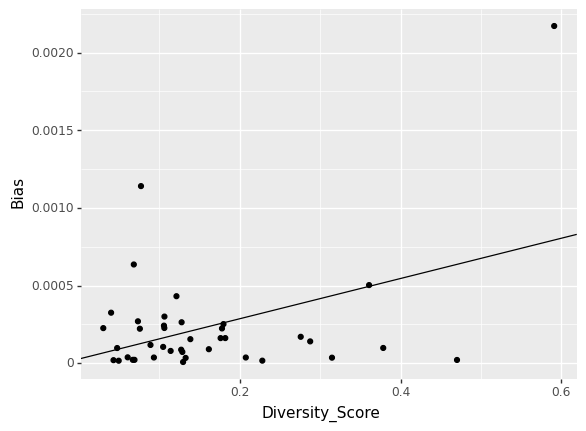

<ggplot: (8789674027577)>

In [8]:
ggplot(cr, aes('Diversity_Score','Bias')) + \
geom_point(stat='identity') + \
geom_abline(slope=reg(cr['Diversity_Score'],cr['Bias'])[0], intercept=reg(cr['Diversity_Score'],cr['Bias'])[1])

In [9]:
# Correlation between the ethinic diversity and bias

reg(cr['PD_Diversity'],cr['Bias'])
# Give that the slope of the regression is potiv we see a positive relationship between PD diversity & Bias

LinregressResult(slope=0.0036766799279616055, intercept=1.7250138167522954e-05, rvalue=0.3845390463087501, pvalue=0.014287902630051034, stderr=0.0014317804817424317)

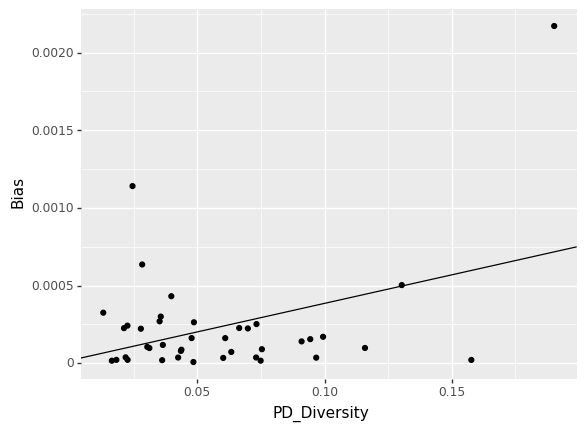

<ggplot: (8789663531589)>

In [10]:
ggplot(cr, aes('PD_Diversity','Bias')) + \
geom_point(stat='identity') + \
geom_abline(slope=reg(cr['PD_Diversity'],cr['Bias'])[0], intercept=reg(cr['PD_Diversity'],cr['Bias'])[1])